In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Read the csv file into a pandas DataFrame

Final_Dataset = pd.read_csv('Final_Dataset.csv')
Final_Dataset.head()

,Region,Year,Number of deaths,Lifetime risk of maternal death (%),"Maternal mortality ratio (deaths per 100,000 live births)",Domestic private health expenditure (% of current health expenditure),Domestic general government health expenditure (% of GDP),GDP per capita (international-$)
0,East Asia & Pacific,2000,34000,0.21,113,29.52,4.34,7178.89
1,Europe & Central Asia,2000,3400,0.05,33,24.49,5.88,22220.70
2,Latin America & Caribbean,2000,12000,0.29,99,56.91,2.53,11458.67
3,Middle East & North Africa,2000,8700,0.38,113,44.46,2.48,13554.73
4,North America,2000,510,0.02,12,54.50,5.56,45146.13


In [5]:
# Assign the data to X and y
# y is what you want you want to predict
X = Final_Dataset[["Number of deaths", "Lifetime risk of maternal death (%)"]]
y = Final_Dataset["Year"].values.reshape(-1, 1)
print(X.shape, y.shape)

(112, 2) (112, 1)


In [6]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
# Create the model using LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [8]:
# Fit the model to the training data and calculate the scores for the training and testing data

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.06832065925814668
Testing Score: -0.2679983377680686


Text(0.5, 1.0, 'Residual Plot')

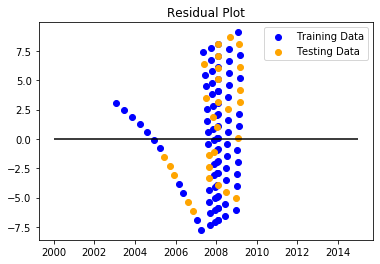

In [9]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

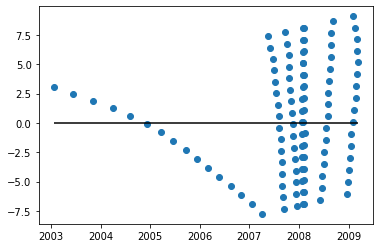

In [10]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()